In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import re # Extract numeric
import numpy as np
flexso_csv = pd.read_csv('flexso_stage.csv', delimiter=',',decimal='.')
flexso_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              77 non-null     object 
 1   Description        20 non-null     object 
 2   Issue ID           77 non-null     int64  
 3   URL                77 non-null     object 
 4   State              77 non-null     object 
 5   Author             77 non-null     object 
 6   Author Username    77 non-null     object 
 7   Assignee           74 non-null     object 
 8   Assignee Username  74 non-null     object 
 9   Confidential       77 non-null     object 
 10  Locked             77 non-null     object 
 11  Due Date           0 non-null      float64
 12  Created At (UTC)   77 non-null     object 
 13  Updated At (UTC)   77 non-null     object 
 14  Closed At (UTC)    77 non-null     object 
 15  Milestone          77 non-null     object 
 16  Weight             0 non-nul

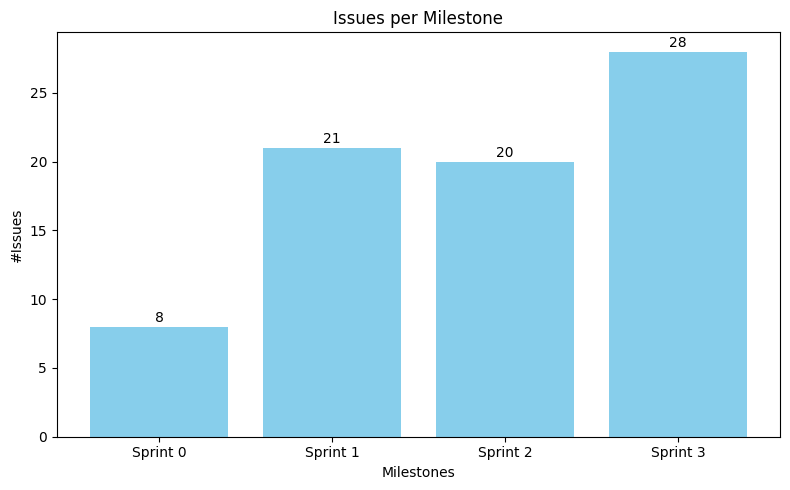

In [81]:
cleaned = flexso_csv[['Title', 'Milestone']]
df = pd.DataFrame(cleaned)
title_counts = df['Milestone'].value_counts().sort_index()
milestones = title_counts.index
counts = title_counts.values

plt.figure(figsize=(8, 5))
bars = plt.bar(milestones, counts, color='skyblue')
plt.title('Issues per Milestone')
plt.xlabel('Milestones')
plt.ylabel('#Issues')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [82]:
#getting all the weights from the labels
df = pd.DataFrame(flexso_csv)

def extract_weight(label):
    matches = re.findall(r'Weight (\d)', label)
    return int(matches[0]) if matches else ''

df['Weight'] = df['Labels'].apply(extract_weight)
df

,Title,Description,Issue ID,URL,State,Author,Author Username,Assignee,Assignee Username,Confidential,Locked,Due Date,Created At (UTC),Updated At (UTC),Closed At (UTC),Milestone,Weight,Labels,Time Estimate,Time Spent
0,Setup project,NaN,1,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Vera Wise,wisever,No,No,NaN,2025-03-31 16:47:05,2025-04-01 10:23:29,2025-04-01 09:53:23,Sprint 0,1,Weight 1,0,0
1,Setup a working Frontend,NaN,2,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Vera Wise,wisever,No,No,NaN,2025-04-01 09:53:50,2025-04-01 11:30:45,2025-04-01 11:30:44,Sprint 0,1,Weight 1,0,0
2,Go through SAPUI5 tutorial 'Walkthrough',NaN,3,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Dordje Devaux,devaudo,No,No,NaN,2025-04-01 09:54:26,2025-04-22 09:14:58,2025-04-22 09:14:58,Sprint 0,2,"Doing,Weight 2",0,0
3,Setup a working Backend,NaN,4,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Vera Wise,wisever,No,No,NaN,2025-04-01 10:13:21,2025-04-01 11:30:46,2025-04-01 11:30:46,Sprint 0,1,Weight 1,0,0
4,Go through tutorials CAP and SAPUI5,NaN,5,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Vera Wise,wisever,No,No,NaN,2025-04-01 11:31:24,2025-04-04 16:57:28,2025-04-04 16:57:28,Sprint 0,2,Weight 2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Finish README&overdracht document,'- [x] word bestand gebaseerd op readme\r\n- [...,73,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,Vera Wise,wisever,No,No,NaN,2025-05-28 17:36:46,2025-06-06 18:12:48,2025-06-06 18:12:48,Sprint 3,1,Weight 1,0,0
73,Small Fixes for app,voor #72:\r\n- [x] 3 types of permanent border...,74,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Vera Wise,wisever,NaN,NaN,No,No,NaN,2025-06-02 15:21:15,2025-06-06 13:56:33,2025-06-06 13:56:32,Sprint 3,3,Weight 3,0,0
74,"add loading markers for deployed version, is s...",NaN,75,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Dordje Devaux,devaudo,Dordje Devaux,devaudo,No,No,NaN,2025-06-03 10:22:12,2025-06-04 22:15:36,2025-06-04 22:08:56,Sprint 3,1,Weight 1,0,0
75,Upload zip files,'-> via https://www.youtube.com/watch?v=gIW_tH...,76,https://flexso.gitlab.host/flexso/flexso/stude...,Closed,Dordje Devaux,devaudo,Dordje Devaux,devaudo,No,No,NaN,2025-06-04 09:01:56,2025-06-04 22:15:13,2025-06-04 22:15:13,Sprint 3,2,Weight 2,0,0


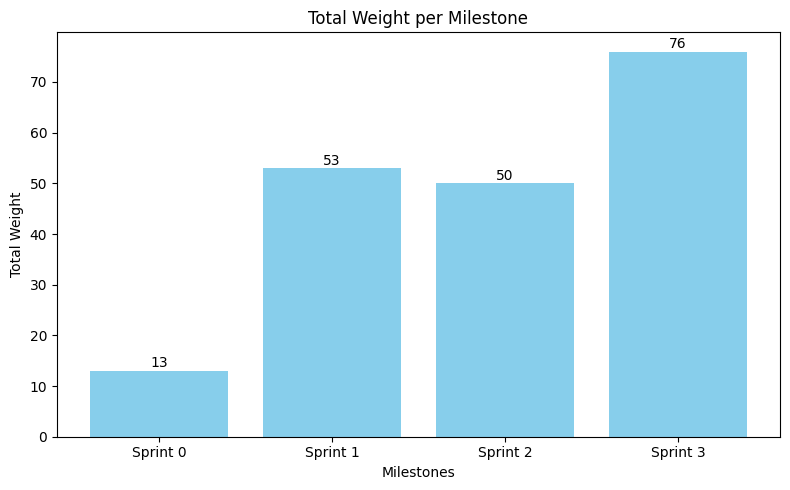

In [83]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
weight_counts = df.groupby('Milestone')['Weight'].sum().sort_index()

milestones = weight_counts.index
counts = weight_counts.values

plt.figure(figsize=(8, 5))
bars = plt.bar(milestones, counts, color='skyblue')
plt.title('Total Weight per Milestone')
plt.xlabel('Milestones')
plt.ylabel('Total Weight')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

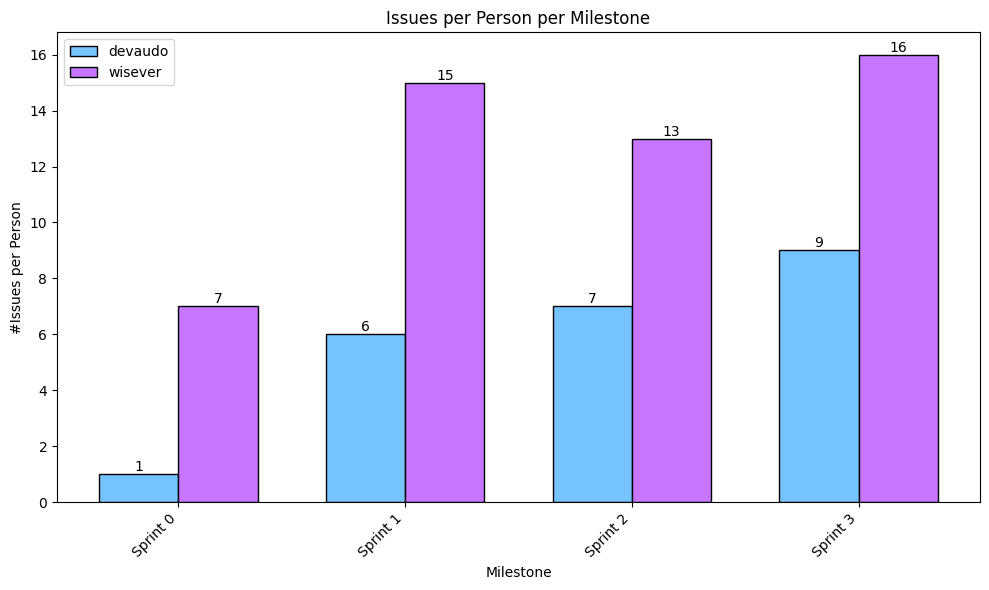

In [84]:
cleaned3 = flexso_csv[['Assignee Username', 'Milestone']]
df3 = pd.DataFrame(cleaned3)
assignee_counts = df3.groupby(['Milestone', 'Assignee Username']).size().unstack(fill_value=0)

# print(assignee_counts)
total_counts = assignee_counts.sum(axis=0)
plt.figure(figsize=(10, 6))
bar_width = 0.35
milestones = assignee_counts.index
x = np.arange(len(milestones))

bars1 = plt.bar(x - bar_width/2, assignee_counts['devaudo'], bar_width, label='devaudo', color='#76c4ff', edgecolor='black')
bars2 = plt.bar(x + bar_width/2, assignee_counts['wisever'], bar_width, label='wisever', color='#c776ff', edgecolor='black')

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Milestone')
plt.ylabel('#Issues per Person')
plt.title('Issues per Person per Milestone')
plt.xticks(x, milestones, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

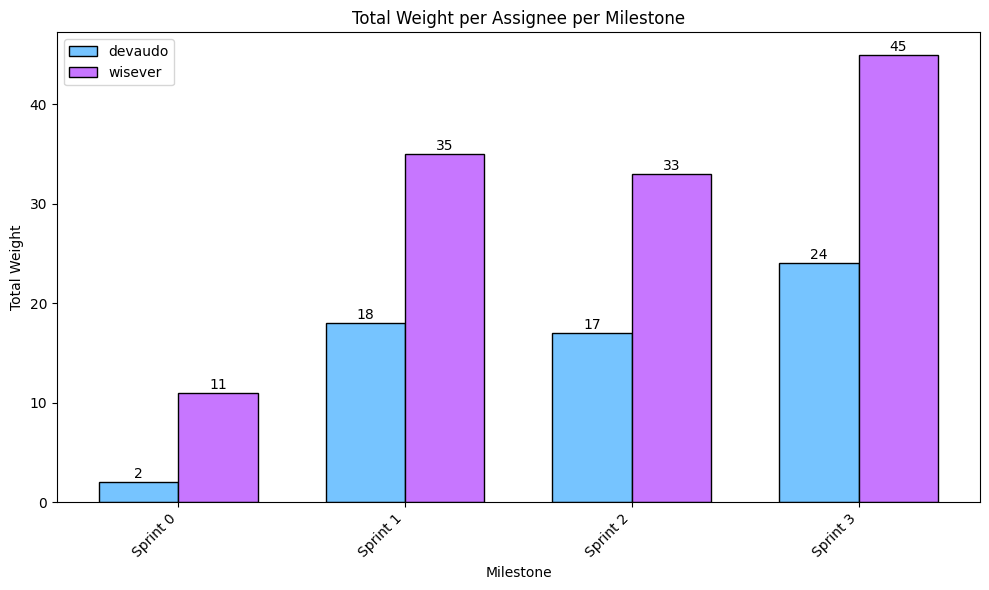

In [85]:
weight_counts = df.groupby(['Milestone', 'Assignee Username'])['Weight'].sum().unstack(fill_value=0)

assignees = weight_counts.columns
plt.figure(figsize=(10, 6))
bar_width = 0.35
milestones = weight_counts.index
x = np.arange(len(milestones))

if 'devaudo' in weight_counts.columns:
    bars1 = plt.bar(x - bar_width/2, weight_counts['devaudo'], bar_width, label='devaudo', color='#76c4ff', edgecolor='black')
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10)
if 'wisever' in weight_counts.columns:
    bars2 = plt.bar(x + bar_width/2, weight_counts['wisever'], bar_width, label='wisever', color='#c776ff', edgecolor='black')
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Milestone')
plt.ylabel('Total Weight')
plt.title('Total Weight per Assignee per Milestone')
plt.xticks(x, milestones, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()